In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt
%matplotlib inline

import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
uploaded = files.upload()
data = pd.read_excel(io.BytesIO(uploaded['data_project1_file.xlsx']))
data = data.set_index('Unnamed: 0')
data.index.names = ['Index']
data.head(2)

In [ ]:
# making labels - 1 for 'footbal' class and 0 for 'boxing' class
# concatenating text data with labels
foot_label = pd.Series(np.ones(304, int))
box_label = pd.Series(np.zeros(305, int))
labels = pd.concat([foot_label, box_label], axis = 0, ignore_index=True)
data["Labels"] = labels
data[302:307]

In [7]:
def preprocess(messg):
  """
  Function for cleaning text data - including following processes (steps):
  - normalizing text to lower case
  - processing text through SpaCy pipline with english small language model
  - removing stopwords, numbers and punctuation
  - getting words' lemmas

  messg = piece of text data
  """
  messg = messg.lower()
  messg = nlp(messg)
  doc = " ".join(char.lemma_ for char in messg if (not char.is_stop and not char.is_punct and not char.like_num))
  return doc

data["Text"] = data["Text"].apply(preprocess)
data.tail(2)

,Text,Labels
Index,,
607,brilliant tragic tale battle siki box african ...,0
608,heavyweight miracle send hasim rahman starry e...,0


In [9]:
# defining X and y variables (i.e., our features and labels)
X = data["Text"]
y = data["Labels"]

In [10]:
from sklearn.model_selection import train_test_split
from collections import Counter

def counting(text):
  count_dict = Counter()
  for article in text.values:
    for word in article.split():
      count_dict[word] +=1
  
  return count_dict

count_dictionary = counting(X)

In [12]:
number_words = len(count_dictionary)
# length of full vocabulary
number_words

3663

In [13]:
# 10 most common words from vocabulary
count_dictionary.most_common(10)

[('fight', 143),
 ('world', 140),
 ('league', 112),
 ('title', 102),
 ('win', 97),
 ('champion', 93),
 ('goal', 75),
 ('boxing', 74),
 ('say', 66),
 ('score', 63)]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
X_train

In [15]:
X_train.shape, X_test.shape

((487,), (122,))

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


# let's define our 3 models - Naive Bayes, Support Vector Machine and Logistig Regression with TfIdf vectorizer

model_naive1 = Pipeline([('tfidf', TfidfVectorizer()), ('naive_model', MultinomialNB())])
model_svm = Pipeline([('tfidf', TfidfVectorizer()), ('svc', SVC())])
model_log = Pipeline([('tfidf', TfidfVectorizer()), ('log_reg', LogisticRegression())])

In [ ]:
model_naive1.fit(X_train, y_train)
model_svm.fit(X_train, y_train)
model_log.fit(X_train, y_train)

In [18]:
# evaluating models

from sklearn import  metrics

predictions1 = model_naive1.predict(X_test)
predictions2 = model_svm.predict(X_test)
df_naive = pd.DataFrame(metrics.confusion_matrix(y_test, predictions1), index=['true_box', 'true_football'], columns=['predicted_box', 'predicted_football'])
df_naive

,predicted_box,predicted_football
true_box,65,1
true_football,1,55


In [21]:
#! pip install -q scikit-plot

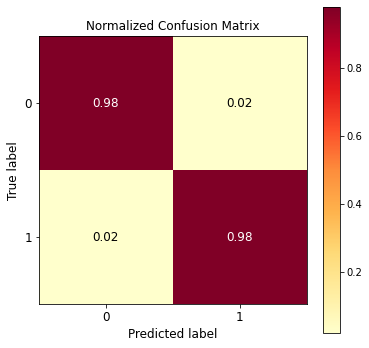

In [24]:
# visualizing the results

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predictions1, cmap = 'YlOrRd', normalize=True, text_fontsize='large', figsize=(6,6))
plt.show()

In [25]:
# same for SVM model - getting confusion matrix

df_svm = pd.DataFrame(metrics.confusion_matrix(y_test, predictions2), index=['true_box', 'true_football'], columns=['predicted_box', 'predicted_football'])
df_svm

,predicted_box,predicted_football
true_box,65,1
true_football,1,55


In [26]:
# and logistic regression

predictions3 = model_log.predict(X_test)
df_log = pd.DataFrame(metrics.confusion_matrix(y_test, predictions3), index=['true_box', 'true_football'], columns=['predicted_box', 'predicted_football'])
df_log

,predicted_box,predicted_football
true_box,65,1
true_football,1,55


In [90]:
 # getting accuracy score for naive bayes model - how good is this classifier?
 print(f'Accuracy scores for:\n\nNaive Bayes - {round(metrics.accuracy_score(y_test, predictions1), 3)}\nSVM -  {round(metrics.accuracy_score(y_test, predictions2), 3)}\nLogReg -  {round(metrics.accuracy_score(y_test, predictions3), 3)}')

Accuracy scores for:

Naive Bayes - 0.984
SVM -  0.984
LogReg -  0.984


In [28]:
from wordcloud import  WordCloud

football_word_set = data["Text"][:304]
football_word_set = " ".join(text for text in football_word_set)

boxing_word_set = data["Text"][304:]
boxing_word_set = " ".join(text for text in boxing_word_set)

In [29]:
len(football_word_set), len(boxing_word_set)

(46669, 46234)

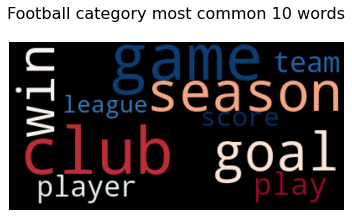

In [69]:
wordcloud_foot = WordCloud(max_words=10, colormap='RdBu').generate(football_word_set)
plt.imshow(wordcloud_foot, interpolation='bilinear')
plt.title('Football category most common 10 words\n', fontsize=16)
plt.axis("off")
plt.show()

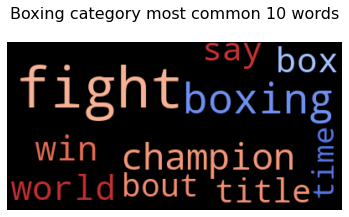

In [71]:
wordcloud_box = WordCloud(max_words=10, colormap='coolwarm').generate(boxing_word_set)
plt.imshow(wordcloud_box, interpolation='bilinear')
plt.title('Boxing category most common 10 words\n', fontsize=16)
plt.axis("off")
plt.show()

In [34]:
# can LDA accurately model our 2 topics?

from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

dtm = cv.fit_transform(X)

In [ ]:
cv.get_feature_names()[100:125]

In [36]:
dtm.shape

(609, 1608)

In [ ]:
LDA.fit(dtm)

In [38]:
# let's see top 10 words (keywords) for first topic

one = LDA.components_[1]
one = one.argsort()[::-1]
one_10 = one[:10]

for i in one_10:
  print(cv.get_feature_names()[i])

fight
title
world
champion
heavyweight
league
win
say
year
wbc


In [40]:
# let's compare top 10 words from 2 topics - there are some diffetences ...
# but at the same time top keywords seem to be similar (or even repeat in 2 topics)

for index, topic in enumerate(LDA.components_):
  print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
  print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
  print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['cup', 'season', 'team', 'goal', 'win', 'year', 'fight', 'game', 'league', 'world']


THE TOP 10 WORDS FOR TOPIC #1
['wbc', 'year', 'say', 'win', 'league', 'heavyweight', 'champion', 'world', 'title', 'fight']




In [41]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel


In [65]:
words = [word.split() for word in X.values]

In [84]:
id2word = Dictionary(words)
corpus = [id2word.doc2bow(t) for t in words]

lda_model = LdaModel(corpus = corpus, id2word = id2word, num_topics = 2, random_state = 3, alpha = 'auto', per_word_topics = True)

In [85]:
# weigths for top words (keywords) for each topic
topics = lda_model.print_topics()

for i in topics:
  print(i[1])

0.011*"world" + 0.010*"fight" + 0.007*"title" + 0.007*"win" + 0.006*"champion" + 0.006*"league" + 0.005*"score" + 0.005*"goal" + 0.004*"time" + 0.004*"heavyweight"
0.008*"league" + 0.007*"fight" + 0.006*"boxing" + 0.005*"say" + 0.005*"champion" + 0.005*"world" + 0.005*"title" + 0.005*"win" + 0.004*"club" + 0.004*"game"
